### Problem Statement :

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of 
handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in 
banks and universities. 

### Objective :

To develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the 
pixel values given as features. Thus, this is a 10-class classification problem.

## Step 1: Reading and Understanding the Data

Let us first import the required libraries and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC

In [3]:
# read the dataset
digitInfo = pd.read_csv('train.csv', encoding = 'latin')
digitInfo.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# inspect digitInfo dataframe

print("*********************************  Info *******************************************") 
print(digitInfo.info())
print("*********************************  Shape ******************************************") 
print(digitInfo.shape)
print("**************************** Columns having null values *****************************")
print(digitInfo.isnull().any())
print("**************************** Describe *****************************")
digitInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
*********************************  Shape ******************************************
(42000, 785)
**************************** Columns having null values *****************************
label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
pixel5      False
pixel6      False
pixel7      False
pixel8      False
pixel9      False
pixel10     False
pixel11     False
pixel12     False
pixel13     False
pixel14     False
pixel15     False
pixel16     False
pixel17     False
pixel18     False
pixel19     False
pixel20     False
pixel21     False
pixel22     False
pixel23     False
pixel24     False
pixel25     False
pixel26     False
pixel27     False
pixel28     False
            ...  
pixel754    

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Step 2: Data Cleaning and Preparation

In [5]:
# Summarise the counts of 'label' to see how many values of each digit are present

digitInfo.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
# Summarise the above count in terms of percentage 

100*(round(digitInfo.label.astype('category').value_counts()/len(digitInfo.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

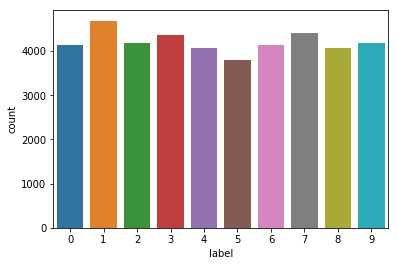

In [7]:
# plot the above information in a count plot

sns.countplot(digitInfo['label'])
plt.show()

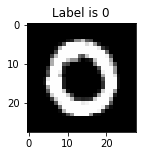

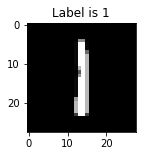

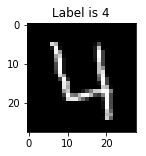

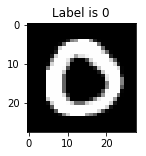

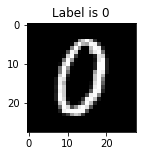

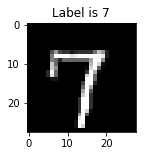

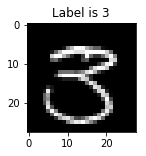

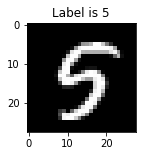

In [8]:
# Let us view some of the digits

# splitting into labelInfo and otherValuesInfo
labelInfo = digitInfo['label']
otherValuesInfo = digitInfo.drop("label", axis = 1)

for i in range(1,9):
    plt.figure(figsize=(2,2))
    plt.title('Label is {label}'.format(label=labelInfo.loc[i]))
    plt.imshow(otherValuesInfo.loc[i,:].values.reshape(28,28),cmap='gray')

In [9]:
# check for null values

np.unique(np.isnan(digitInfo))

array([False])

There are no null values

## Step 3: Train Test Split

In [10]:
# Putting all variables except label in X

X = digitInfo.drop(['label'], axis=1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Putting label variable to y

y = digitInfo['label']
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

#### Scaling the features

In [12]:
# scaling the features

X = scale(X)

In [13]:
# split into train and test
# Since the data is very huge, we will have only 20% of the data in train and rest 80% in test.

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, test_size = 0.80, random_state=42)

In [14]:
# view the shape of xtrain, ytrain, xtest and ytest

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (8400, 784)
X_test: (33600, 784)
y_train: (8400,)
y_test: (33600,)


## Step 4: Model Building
Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

#### Linear SVM

In [15]:
# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# predict
predictions = svm_linear.predict(X_test)
predictions[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1], dtype=int64)

In [17]:
# accuracy and confusion matrix

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=predictions), "\n")

# confusion matrix
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

accuracy: 0.9117857142857143 



array([[3247,    0,   12,    2,   16,   21,   22,    0,   10,    4],
       [   0, 3684,   17,   12,    4,    4,    3,   10,   28,    2],
       [  42,   23, 3063,   64,   48,   14,   44,   31,   45,    6],
       [  19,   22,  108, 3075,   10,  140,    5,   23,   65,   26],
       [   6,   20,   30,    3, 2989,    3,   21,   12,    8,  167],
       [  35,   27,   31,  154,   39, 2614,   48,    4,   53,   18],
       [  58,    6,   33,    1,   39,   42, 3098,    4,    7,    0],
       [   8,   17,   48,   20,   43,    8,    0, 3188,    8,  132],
       [  35,   56,   59,  116,   23,  120,   22,   16, 2773,   33],
       [  21,   22,   12,   50,  125,   19,    1,  154,   25, 2905]],
      dtype=int64)

In [18]:
# class-wise accuracy

class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      3334
          1       0.95      0.98      0.96      3764
          2       0.90      0.91      0.90      3380
          3       0.88      0.88      0.88      3493
          4       0.90      0.92      0.91      3259
          5       0.88      0.86      0.87      3023
          6       0.95      0.94      0.95      3288
          7       0.93      0.92      0.92      3472
          8       0.92      0.85      0.88      3253
          9       0.88      0.87      0.88      3334

avg / total       0.91      0.91      0.91     33600



The linear model gives approx. 91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

#### Non Linear SVM - RBF

In [19]:
# rbf kernel with other hyperparameters kept to default 

svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# predict

predictions = svm_rbf.predict(X_test)
predictions[:10]

array([8, 1, 9, 7, 8, 6, 2, 2, 7, 1], dtype=int64)

In [21]:
# accuracy and confusion matrix

# accuracy 
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=predictions), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=predictions))

accuracy: 0.9372619047619047 

[[3249    0   27    3    6   10   24    4   10    1]
 [   0 3692   27    8    4    2   13    5   10    3]
 [  17    9 3188   34   20    5   31   31   38    7]
 [   6   11  101 3188    6   61    5   31   60   24]
 [   4   11   51    1 3039   10   20   19    7   97]
 [  14    9   40   81   18 2757   64    8   24    8]
 [  26    4   53    0   13   35 3149    2    6    0]
 [   4   18   89   10   21    3    0 3233    7   87]
 [  14   29   51   46   16   61   14   12 2983   27]
 [  11   11   37   48   66   10    0  111   26 3014]]


In [22]:
# class-wise accuracy

class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      3334
          1       0.97      0.98      0.98      3764
          2       0.87      0.94      0.91      3380
          3       0.93      0.91      0.92      3493
          4       0.95      0.93      0.94      3259
          5       0.93      0.91      0.92      3023
          6       0.95      0.96      0.95      3288
          7       0.94      0.93      0.93      3472
          8       0.94      0.92      0.93      3253
          9       0.92      0.90      0.91      3334

avg / total       0.94      0.94      0.94     33600



The non-linear model gives approx. 94% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

#### Grid Search CV -  Hyperparameter Tuning
Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [23]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]}]
    
# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 35.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [24]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,330.530197,18.460025,38.494718,0.656198,1,0.01,"{'C': 1, 'gamma': 0.01}",0.770833,0.718452,0.773214,...,0.754643,0.021120,12,0.999702,0.999851,0.999851,1.000000,0.999851,0.999851,0.000094
1,85.795310,7.156053,24.904196,1.051841,1,0.001,"{'C': 1, 'gamma': 0.001}",0.927976,0.924405,0.941071,...,0.933333,0.006232,4,0.975298,0.975149,0.973214,0.976042,0.972917,0.974524,0.001232
2,116.330656,5.637513,30.717524,1.377922,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.895238,0.896429,0.912500,...,0.904643,0.007438,8,0.921429,0.920536,0.918304,0.920089,0.916667,0.919405,0.001706
3,324.798138,9.602273,38.911805,0.976002,10,0.01,"{'C': 10, 'gamma': 0.01}",0.784524,0.734524,0.786310,...,0.770714,0.019682,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,64.364326,1.986817,20.308918,0.828703,10,0.001,"{'C': 10, 'gamma': 0.001}",0.938095,0.935714,0.947619,...,0.941071,0.004390,1,0.999405,0.999107,0.999256,0.999405,0.998958,0.999226,0.000174
5,50.336855,1.673475,18.587635,0.623963,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.919048,0.916667,0.935119,...,0.926429,0.007247,5,0.963095,0.964435,0.960863,0.962798,0.960863,0.962411,0.001379
6,317.319142,10.433451,38.339905,1.257646,100,0.01,"{'C': 100, 'gamma': 0.01}",0.784524,0.734524,0.786310,...,0.770714,0.019682,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,65.751177,0.904490,20.621223,0.386744,100,0.001,"{'C': 100, 'gamma': 0.001}",0.938690,0.935714,0.945238,...,0.940238,0.003738,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,37.979453,1.132783,15.419345,0.517495,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.917857,0.917857,0.935119,...,0.926190,0.007173,6,0.996429,0.995238,0.995536,0.995089,0.994792,0.995417,0.000560
9,319.201786,9.720533,38.379612,1.034365,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.784524,0.734524,0.786310,...,0.770714,0.019682,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


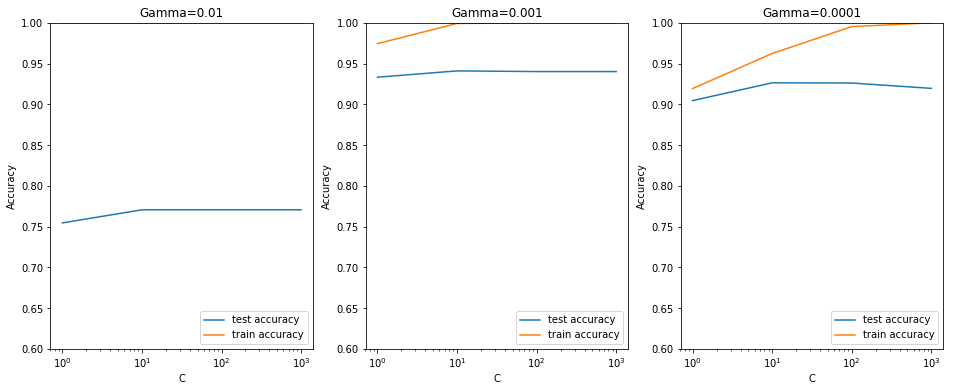

In [25]:
# converting C to numeric type for plotting on x-axis

cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting

plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

The plots above show some useful insights:
- Non-linear models perform *better* than the linear ones
- At gamma = 0.01, the model is achieving 100% accuracy on the training data, though the test score is quite low (<75%). 
  Thus, the model is overfitting.
- At gamma = 0.001, the training and test scores are comparable till around C=10, the training model starts to overfit 
  beyond that.
- At gamma = 0.0001, the model does not overfit till C=10 but starts showing signs at C=100. Also, the training and test scores 
  are slightly lower than at gamma=0.001.

Let's now choose the best hyperparameters.

In [26]:
# printing the optimal accuracy score and hyperparameters

best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9410714285714286 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


## Step 5: Evaluating the Final Model

In [27]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# accuracy and confusion matrix

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9456547619047619 

[[3266    0   21    2    5   14   18    1    3    4]
 [   0 3689   29    8    4    3    8    9   12    2]
 [  17   11 3207   28   15    3   31   34   25    9]
 [   7    7   86 3232    7   57    4   26   44   23]
 [   3   14   42    2 3051    7   20   14    6  100]
 [  12    7   38   70   18 2796   49    6   22    5]
 [  24    3   40    0   11   27 3175    1    7    0]
 [   5   13   72    7   31    4    0 3271    6   63]
 [  18   22   40   45   18   43   11   11 3023   22]
 [  12   12   30   44   55    9    0   88   20 3064]] 



In [29]:
# class-wise accuracy

class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      3334
          1       0.98      0.98      0.98      3764
          2       0.89      0.95      0.92      3380
          3       0.94      0.93      0.93      3493
          4       0.95      0.94      0.94      3259
          5       0.94      0.92      0.93      3023
          6       0.96      0.97      0.96      3288
          7       0.95      0.94      0.94      3472
          8       0.95      0.93      0.94      3253
          9       0.93      0.92      0.92      3334

avg / total       0.95      0.95      0.95     33600



The accuracy achieved using a non-linear kernel on the test data is appx. 95%

Let us predict the model in the test data (test.csv) file provided.

In [30]:
# read the test data

digit_test = pd.read_csv("test.csv")
digit_test.shape

(28000, 784)

In [31]:
# scaling the features

test_scaled = scale(digit_test)

In [32]:
# prediction 

final_prediction = model.predict(test_scaled)
final_prediction[:10]

array([2, 0, 9, 4, 3, 7, 0, 3, 0, 3], dtype=int64)

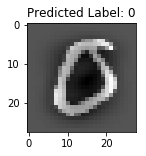

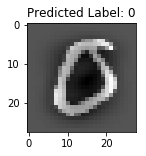

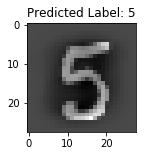

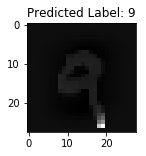

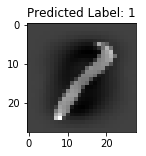

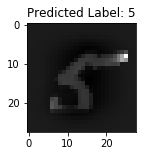

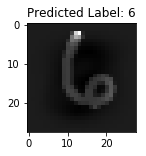

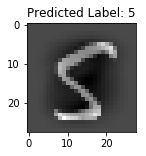

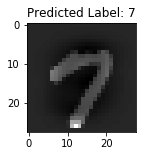

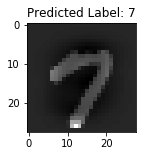

In [33]:
# Let us view few of the digits

a = np.random.randint(1,100,10)
for i in a:
    plt.figure(figsize=(2,2))
    plt.title('Predicted Label: {0}'.format(final_prediction[i]))
    plt.imshow(test_scaled[i].reshape(28,28),cmap='gray')

## Conclusion

 - The accuracy achieved using a non-linear kernel (95%) is higher than that of a linear one (91%).
 - We can conclude that the problem is non-linear in nature.